<a href="https://colab.research.google.com/github/AnkeethaJha-99/Regression_example_files/blob/main/Store_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
data = pd.read_csv("/content/Walmart (1).csv")

In [3]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
#convert the Date column from object to date type
data['Date']= pd.to_datetime(data['Date'],dayfirst=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [7]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [8]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [9]:
#lets try to find the correlation between all the independent features and target variable

Target_var = data['Weekly_Sales']
independent_vars = data.drop(['Weekly_Sales'],axis=1)

In [11]:
from ydata_profiling import ProfileReport

In [12]:
report = ProfileReport(data,minimal=True)

In [14]:
report

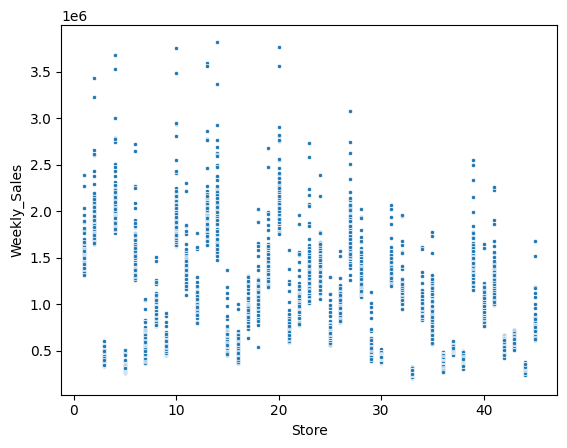

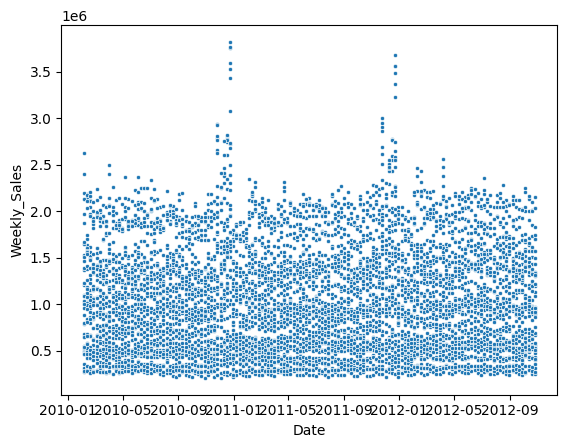

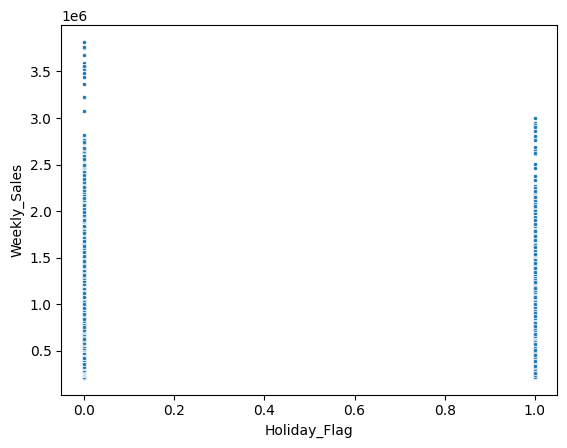

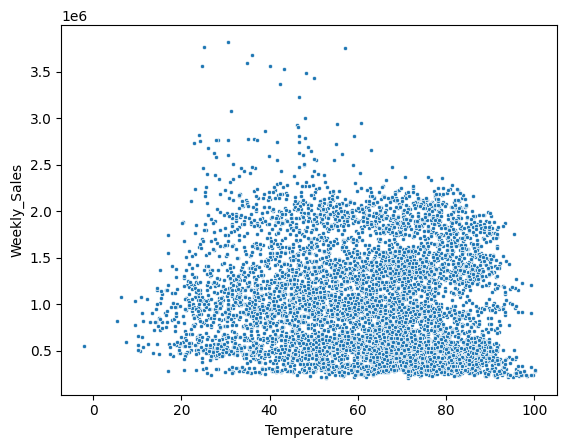

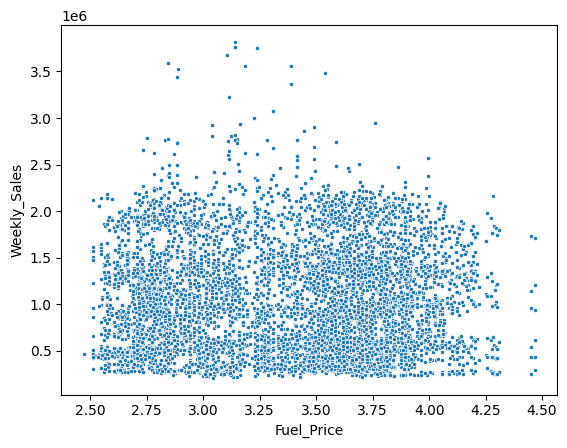

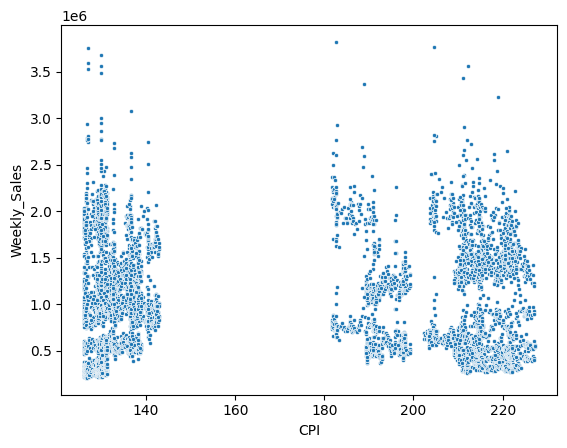

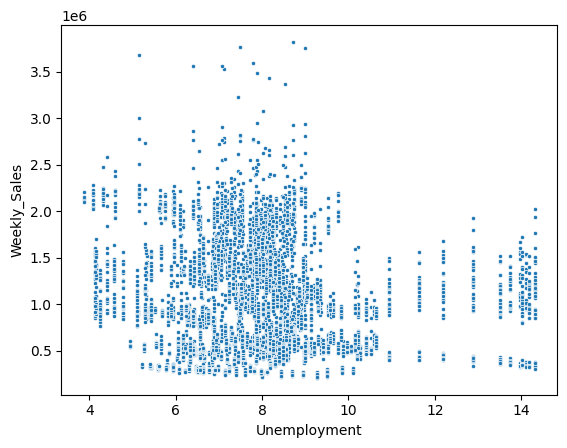

In [15]:
independent_cols = independent_vars.columns

for col in independent_cols:
  sns.scatterplot(y=Target_var,x=independent_vars[col],marker='.')
  plt.show()
  print()


Cannot see a good correlation between anyof the above plots.

<ipython-input-17-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<AxesSubplot: >

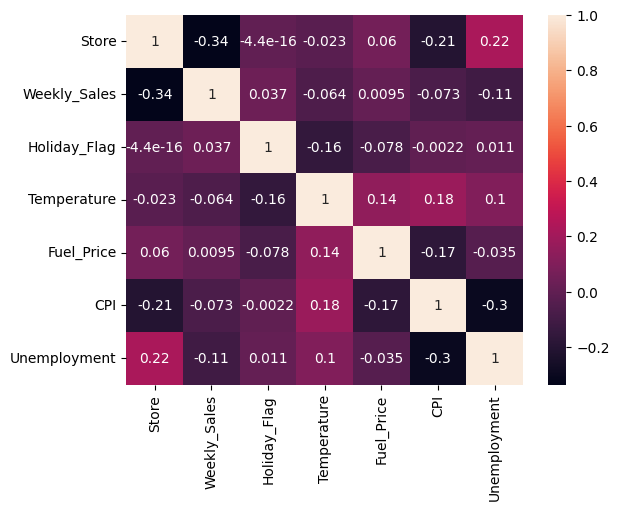

In [17]:
sns.heatmap(data.corr(),annot=True)

In [18]:
#lets fit the model
from sklearn.model_selection import train_test_split

In [23]:
data['Year'] = data['Date'].apply(lambda time: time.year)

data['Month'] = data['Date'].apply(lambda time: time.month)

data['Day'] = data['Date'].apply(lambda time: time.day)

In [25]:
data.drop('Date',inplace=True,axis=1)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Year          6435 non-null   int64  
 8   Month         6435 non-null   int64  
 9   Day           6435 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 502.9 KB


In [28]:
train_x,test_x,train_y,test_y= train_test_split(data.drop('Weekly_Sales',axis=1),Target_var,test_size=0.2,random_state=42)

In [30]:
x= sm.add_constant(train_x)
y= train_y

In [32]:
clf = sm.OLS(y,x).fit()

In [34]:
print(clf.summary2())

                           Results: Ordinary least squares
Model:                    OLS                    Adj. R-squared:           0.146      
Dependent Variable:       Weekly_Sales           AIC:                      150145.7348
Date:                     2023-05-06 17:49       BIC:                      150211.1984
No. Observations:         5148                   Log-Likelihood:           -75063.    
Df Model:                 9                      F-statistic:              98.87      
Df Residuals:             5138                   Prob (F-statistic):       5.80e-171  
R-squared:                0.148                  Scale:                    2.7117e+11 
--------------------------------------------------------------------------------------
                 Coef.        Std.Err.      t     P>|t|      [0.025         0.975]    
--------------------------------------------------------------------------------------
const        47953085.7197 33372811.6176   1.4369 0.1508 -17471835.2774

As per the above summary , the variables - Holiday_flg,fuel_price, year, day have p value less than 0.05, whoch indicates these do not have impact on the tartget variable and can be removed.

In [45]:
feature =clf.params.index.to_numpy()

In [57]:
pvalue=clf.pvalues.to_numpy()

In [58]:
param = pd.DataFrame({'features': feature,'pvalues':pvalue })
param.drop(0,inplace=True)

In [59]:
#filter the important features

param = param[param['pvalues']<0.05]

In [60]:
param

,features,pvalues
1,Store,1.298315e-140
3,Temperature,3.574447e-04
5,CPI,2.554022e-23
6,Unemployment,6.677441e-08
8,Month,3.028793e-09


Lets fit another model with these features and check if the r2 has increased or not

In [61]:
x= data[list(param['features'])]
x

,Store,Temperature,CPI,Unemployment,Month
0,1,42.31,211.096358,8.106,2
1,1,38.51,211.242170,8.106,2
2,1,39.93,211.289143,8.106,2
3,1,46.63,211.319643,8.106,2
4,1,46.50,211.350143,8.106,3
...,...,...,...,...,...
6430,45,64.88,192.013558,8.684,9
6431,45,64.89,192.170412,8.667,10
6432,45,54.47,192.327265,8.667,10
6433,45,56.47,192.330854,8.667,10


In [62]:
train_x,test_x,train_y,test_y= train_test_split(x,Target_var,test_size=0.2,random_state=42)

In [63]:
X= sm.add_constant(train_x)
y= train_y

In [65]:
clf = sm.OLS(y,X).fit()

In [66]:
print(clf.summary2())

                       Results: Ordinary least squares
Model:                  OLS                 Adj. R-squared:        0.145      
Dependent Variable:     Weekly_Sales        AIC:                   150145.5180
Date:                   2023-05-06 18:11    BIC:                   150184.7962
No. Observations:       5148                Log-Likelihood:        -75067.    
Df Model:               5                   F-statistic:           176.3      
Df Residuals:           5142                Prob (F-statistic):    1.23e-173  
R-squared:              0.146               Scale:                 2.7137e+11 
------------------------------------------------------------------------------
                Coef.      Std.Err.     t     P>|t|     [0.025       0.975]   
------------------------------------------------------------------------------
const        1949847.6302 57480.8804  33.9217 0.0000 1837160.6498 2062534.6106
Store         -15157.4694   579.3636 -26.1623 0.0000  -16293.2686  -14021.67

In [69]:
test_x.shape

(1287, 5)

In [70]:
y_pred=clf.predict(sm.add_constant(test_x))

In [71]:
y_pred

2436    1.159625e+06
3361    1.086739e+06
233     1.324024e+06
3667    1.194744e+06
5011    6.992526e+05
            ...     
2600    1.193975e+06
6308    6.329744e+05
6292    6.529820e+05
151     1.231102e+06
2344    1.264187e+06
Length: 1287, dtype: float64

In [73]:
clf.mse_resid


271371386827.86838

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
clf = LinearRegression()

In [77]:
clf.fit(train_x,train_y)

LinearRegression()

In [99]:
y_pred = clf.predict(test_x)

In [100]:
y_pred

array([1159624.59131773, 1086738.73326186, 1324024.38048197, ...,
        652982.03281226, 1231101.85912176, 1264186.98875892])

In [101]:
test_y

2436    1138800.32
3361    1304850.67
233     1769296.25
3667    1077640.13
5011     428851.99
           ...    
2600    1492060.89
6308     801098.43
6292     890689.51
151     2066187.72
2344     816138.33
Name: Weekly_Sales, Length: 1287, dtype: float64

In [93]:
clf.score(train_x,train_y)

0.1463294372201478

In [94]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [102]:
len(y_pred)

1287

In [103]:
mean_squared_error(test_y,y_pred)

272477344563.1168